3.How does the movie budget impact box office revenue, and can smaller budget films be profitable?
 
  1.How does the movie budget affect box office revenue?

  2.Can smaller budget films be profitable, and is there an optimal budget range?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Reading the movie_budgets.csv
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
tn_movie_budgets .head()

# Getting the general information of the budgets_df
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [3]:
pd.options.display.float_format = '{:.2f}'.format
#load the data
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
# we notice our currency columns are of object type and we want them to be floats
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
# calculate the profits
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00


In [4]:
# Finding the correlation between production_budget,and worldwide gross 
coerrelation_coefficient = tn_movie_budgets['production_budget'].corr(tn_movie_budgets['worldwide_gross'])
print("coerrelation coefficient: ", coerrelation_coefficient)


coerrelation coefficient:  0.7483059765694747


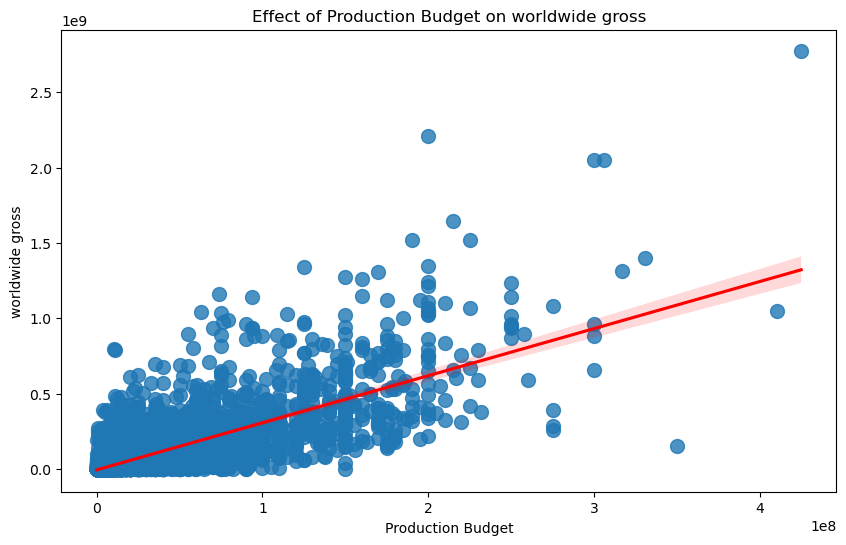

In [5]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets, scatter_kws={'s':100}, line_kws={'color':'red'})

# Customize the plot
plt.title('Effect of Production Budget on worldwide gross')
plt.xlabel('Production Budget')
plt.ylabel('worldwide gross')

# Show the plot
plt.show()

A positive relationship between the production  budget and worldwide gross

# 2.Can smaller budget films be profitable, and is there an optimal budget range?

Conclusion
1.Impact of Budget on Box Office Revenue: The relationship between production budget and profitability is complex. While higher budgets can lead to higher box office revenues, they also carry higher risks and require larger returns to be profitable.
Profitability of Smaller Budget Films:

2.Smaller budget films (0-$10 million and $10-$50 million ranges) often have higher profitability percentages. They can be highly profitable if they manage to attract a significant audience despite their lower production costs.
Optimal Budget Range: 

3.The optimal budget range for profitability often lies within the smaller to mid-budget ranges (0-$50 million). These movies can balance cost and revenue more effectively, reducing financial risk while still providing opportunities for significant returns.
These findings can help filmmakers and producers make informed decisions about budget allocations for future projects.








In [6]:
# Add a column to indicate if the film is profitable
tn_movie_budgets['profitable'] = tn_movie_budgets['profit'] > 0

# Determine the minimum and maximum production budget
min_budget = tn_movie_budgets['production_budget'].min()
max_budget = tn_movie_budgets['production_budget'].max()
# Define budget intervals (bins) for analysis
num_bins = 5
bin_edges = pd.interval_range(start=min_budget, end=max_budget, periods=num_bins)
# Create bins for the production budget
tn_movie_budgets['budget_bin'] = pd.cut(tn_movie_budgets['production_budget'], bins=bin_edges)
# Calculate the percentage of profitable films within each budget bin
profitability_by_bin = tn_movie_budgets.groupby('budget_bin')['profitable'].mean() * 100
# Convert the results to a DataFrame
profitability_df = profitability_by_bin.reset_index()
profitability_df.columns = ['budget_range', 'Profitability (%)']
# Format the budget range strings
def format_budget_range(interval):
    """Convert interval to currency format string"""
    start, end = interval.left, interval.right
    return f"${start:,.0f} - ${end:,.0f}"

profitability_df['budget_range'] = profitability_df['budget_range'].map(format_budget_range)

# Display the results
print(profitability_df)

                  budget_range  Profitability (%)
0         $1,100 - $85,000,880              60.80
1   $85,000,880 - $170,000,660              88.00
2  $170,000,660 - $255,000,440              96.88
3  $255,000,440 - $340,000,220              92.31
4  $340,000,220 - $425,000,000              66.67


C:\Users\Pc\AppData\Local\Temp\ipykernel_16972\3987838533.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profitability_by_bin = tn_movie_budgets.groupby('budget_bin')['profitable'].mean() * 100


C:\Users\Pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


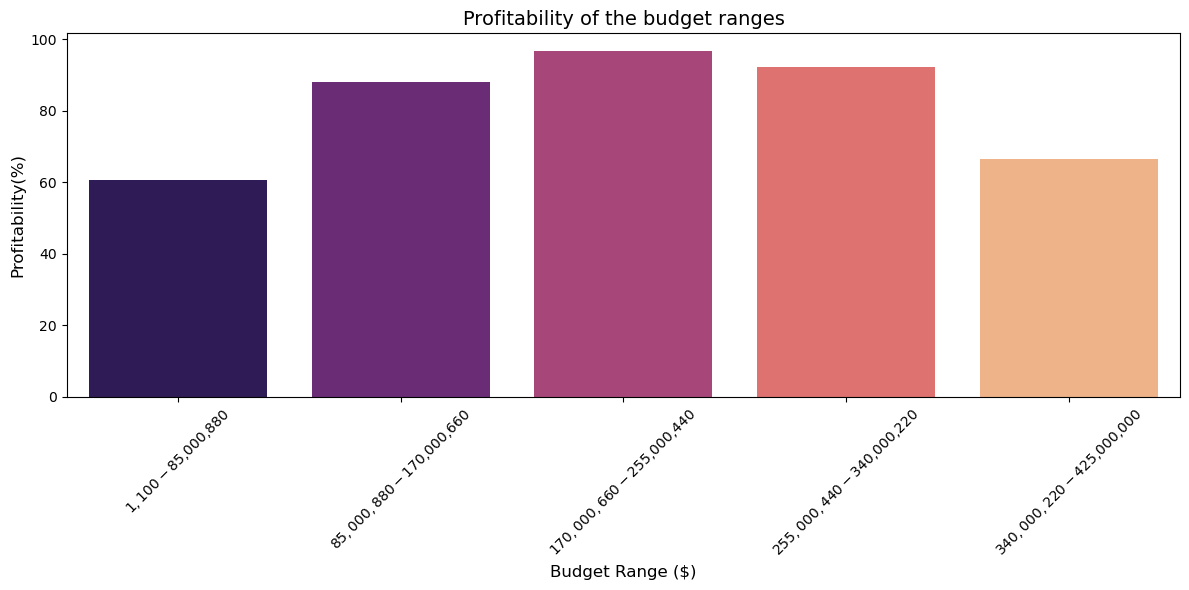

In [7]:
#Identifying Profitability of Smaller Budget Films

# plot the bar graphs of the profitabiltiy of the various budget ranges

plt.figure(figsize=(12,6))
sns.barplot(x='budget_range', y='Profitability (%)', data=profitability_df, palette='magma')
plt.xlabel('Budget Range ($)', fontsize=12)
plt.ylabel('Profitability(%)', fontsize=12)
plt.title('Profitability of the budget ranges', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()











The data suggests that as the budget increases, profitability generally increases, peaking in the $170,000,660 - $255,000,440 range. However, beyond this peak, the profitability decreases slightly, indicating diminishing returns on investment for higher budget ranges.

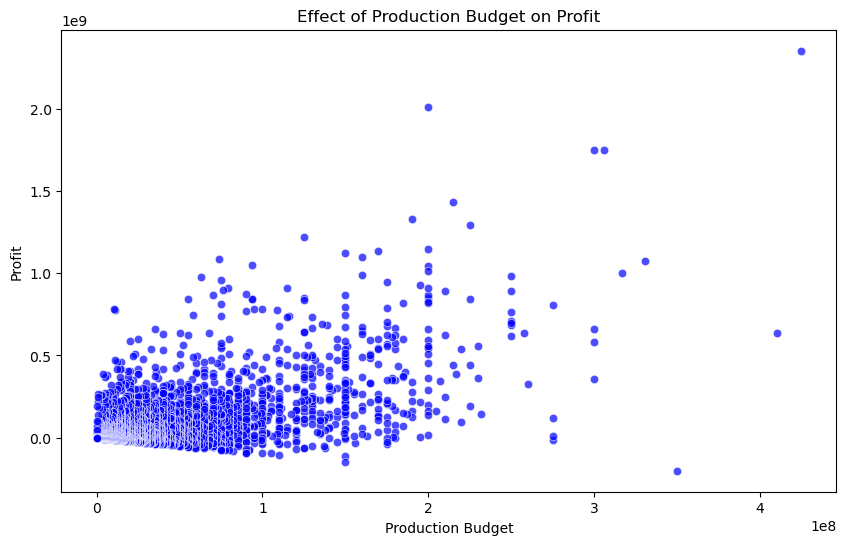

In [8]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
# sns.regplot(x='production_budget', y='profit', data=tn_movie_budgets, scatter_kws={'s':100}, line_kws={'color':'red'})
sns.scatterplot(x='production_budget', y='profit', data=tn_movie_budgets,  color='blue', alpha=0.7)
# Customize the plot
plt.title('Effect of Production Budget on Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')

# Show the plot
plt.show()

# data modeling and evaluation

In [9]:
import statsmodels .api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress

In [28]:
# Define the dependent variable y (profit)
y = tn_movie_budgets['profit']

# Define independent variables
predictors = {
    'Production Budget': tn_movie_budgets[['production_budget']],
    'Domestic Gross': tn_movie_budgets[['domestic_gross']],
    'Worldwide Gross': tn_movie_budgets[['worldwide_gross']]
}

# Fit OLS models and print summaries
for name, X in predictors.items():
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const)
    results = model.fit()
    print(f"--- {name} ---")
    print(results.summary())

--- Production Budget ---
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3403.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:23:28   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const       

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant to the dataset
X = sm.add_constant(tn_movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']])
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Variable   VIF
0              const  1.73
1  production_budget  2.28
2     domestic_gross  8.48
3    worldwide_gross 10.21
